In [ ]:
!mkdir models6

In [1]:
!ls

models
models2
models3
models4
models5
models6
RNN_LSTM_Keras_working_35epo_selected.ipynb
RNN_LSTM_Keras_working_50_epo_adam.ipynb
RNN_LSTM_Keras_working_50_epo_selected.ipynb
RNN_LSTM_Keras_working.ipynb
RNN_LSTM_Keras_working-just_for_50ep_SGD_Momentum-Copy1.ipynb
RNN_LSTM_Keras_working-just_for_50ep_SGD_No_Momentum.ipynb
RNN_LSTM_Keras_working-just_for_SGD_Momentum.ipynb


In [2]:
%matplotlib inline

from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras import optimizers

from keras.models import Model
from keras.layers import Input, Dense, TimeDistributed, LSTM
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


def img_resize(org_imgs, target_size):
  x_imgs = []
  for i in range(0,org_imgs.shape[0]):
    x_img = cv2.resize(org_imgs[i], dsize=(target_size, target_size), interpolation=cv2.INTER_CUBIC)
    x_imgs.append(x_img)
  return np.array(x_imgs)


def plot_model(model_details):

    # Create sub-plots
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    # Summarize history for loss
    axs[1].plot(range(1,len(model_details.history['loss'])+1),model_details.history['loss'])
    axs[1].plot(range(1,len(model_details.history['val_loss'])+1),model_details.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_details.history['loss'])+1),len(model_details.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_details.history['acc'])+1),model_details.history['acc'])
    axs[0].plot(range(1,len(model_details.history['val_acc'])+1),model_details.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_details.history['acc'])+1),len(model_details.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # Show the plot
    plt.show()
    
    
# Training parameters.
batch_sizes = [32,64]
num_epochs = [50]
learning_rates = [0.01,0.05]
optimizers_name = ['sgd']
num_classes = 10
node_sizes = [128]

# The data, shuffled and split between train and test sets.
(images, labels), (_, _) = fashion_mnist.load_data()

images_zoomed_in = img_resize(images, 48)
images_zoomed_in = images_zoomed_in.reshape(images_zoomed_in.shape[0], images_zoomed_in.shape[1], images_zoomed_in.shape[2], 1).astype('float32')

x_train = images_zoomed_in[0:50000]
x_test = images_zoomed_in[50000:60000]

y_train = labels[0:50000]
y_test = labels[50000:60000]


# x_train -= np.mean(x_train)
# x_test -= np.mean(x_train)

# x_train /= np.std(x_train)
# x_test /= np.std(x_train)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


TRAIN_DATA_SIZE = x_train.shape[0]
TEST_DATA_SIZE = x_test.shape[0]

#TRAIN_BATCH_SIZE = 20
#TEST_BATCH_SIZE = 10

#train_step = int(TRAIN_DATA_SIZE/TRAIN_BATCH_SIZE)
#test_step = int(TEST_DATA_SIZE/TEST_BATCH_SIZE)


# Converts class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

train_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
train_gen.fit(x_train)
#train_batches = train_gen.flow(x_train, y_train, batch_size=TRAIN_BATCH_SIZE, shuffle=False, seed=10)

test_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
test_gen.fit(x_train)
#test_batches = test_gen.flow(x_test, y_test, batch_size=TEST_BATCH_SIZE, shuffle=False, seed=10)

#row, col, pixel = x_train.shape[1:]


best_model = None
best_accuracy = 0
best_batch_size = 0
best_epochs = 0
best_optimizer = ''
best_learning_rate = 0
best_node_size = 0

/home/ryantsan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (50000, 48, 48, 1)
50000 train samples
10000 test samples


batch size    : 32
epochs        : 50
optimizer     : sgd
learning rate : 0.01
node size     : 128
Epoch 1/50
1562/1562 [==============================] - 139s 89ms/step - loss: 1.8916 - acc: 0.3039 - val_loss: 1.4164 - val_acc: 0.4402

Epoch 00001: val_loss improved from inf to 1.41637, saving model to models6/rnn_lstm.h5
Epoch 2/50
1562/1562 [==============================] - 137s 88ms/step - loss: 1.2686 - acc: 0.4971 - val_loss: 1.1251 - val_acc: 0.5591

Epoch 00002: val_loss improved from 1.41637 to 1.12511, saving model to models6/rnn_lstm.h5
Epoch 3/50
1562/1562 [==============================] - 138s 88ms/step - loss: 0.9590 - acc: 0.6336 - val_loss: 0.8338 - val_acc: 0.6857

Epoch 00003: val_loss improved from 1.12511 to 0.83384, saving model to models6/rnn_lstm.h5
Epoch 4/50
1562/1562 [==============================] - 137s 88ms/step - loss: 0.7280 - acc: 0.7332 - val_loss: 0.6544 - val_acc: 0.7623

Epoch 00004: val_loss improved from 0.83384 to 0.65439, saving model to model

1562/1562 [==============================] - 137s 88ms/step - loss: 0.2609 - acc: 0.9025 - val_loss: 0.3100 - val_acc: 0.8877

Epoch 00038: val_loss did not improve from 0.30378
Epoch 39/50
1562/1562 [==============================] - 137s 88ms/step - loss: 0.2585 - acc: 0.9047 - val_loss: 0.3060 - val_acc: 0.8901

Epoch 00039: val_loss did not improve from 0.30378
Epoch 40/50
1562/1562 [==============================] - 137s 88ms/step - loss: 0.2569 - acc: 0.9055 - val_loss: 0.3017 - val_acc: 0.8899

Epoch 00040: val_loss improved from 0.30378 to 0.30174, saving model to models6/rnn_lstm.h5
Epoch 41/50
1562/1562 [==============================] - 137s 88ms/step - loss: 0.2517 - acc: 0.9057 - val_loss: 0.3175 - val_acc: 0.8859

Epoch 00041: val_loss did not improve from 0.30174
Epoch 42/50
1562/1562 [==============================] - 137s 88ms/step - loss: 0.2488 - acc: 0.9073 - val_loss: 0.2988 - val_acc: 0.8947

Epoch 00042: val_loss improved from 0.30174 to 0.29881, saving model to 

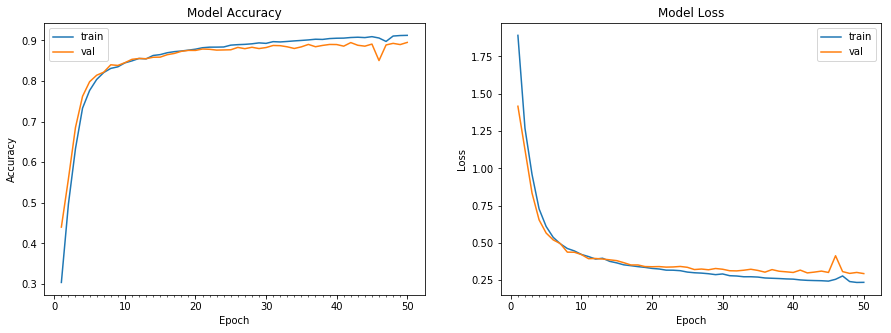

batch size    : 32
epochs        : 50
optimizer     : sgd
learning rate : 0.05
node size     : 128
Epoch 1/50
1562/1562 [==============================] - 138s 89ms/step - loss: 1.2140 - acc: 0.5380 - val_loss: 0.7629 - val_acc: 0.7121

Epoch 00001: val_loss improved from inf to 0.76294, saving model to models6/rnn_lstm.h5
Epoch 2/50
1562/1562 [==============================] - 137s 88ms/step - loss: 0.6391 - acc: 0.7681 - val_loss: 0.5612 - val_acc: 0.7934

Epoch 00002: val_loss improved from 0.76294 to 0.56125, saving model to models6/rnn_lstm.h5
Epoch 3/50
1562/1562 [==============================] - 137s 88ms/step - loss: 0.5041 - acc: 0.8173 - val_loss: 0.4831 - val_acc: 0.8255

Epoch 00003: val_loss improved from 0.56125 to 0.48312, saving model to models6/rnn_lstm.h5
Epoch 4/50
1562/1562 [==============================] - 138s 88ms/step - loss: 0.4494 - acc: 0.8378 - val_loss: 0.4130 - val_acc: 0.8537

Epoch 00004: val_loss improved from 0.48312 to 0.41301, saving model to model

1562/1562 [==============================] - 138s 88ms/step - loss: 0.1637 - acc: 0.9385 - val_loss: 0.2619 - val_acc: 0.9100

Epoch 00039: val_loss did not improve from 0.25293
Epoch 40/50
1562/1562 [==============================] - 138s 88ms/step - loss: 0.1713 - acc: 0.9364 - val_loss: 0.2577 - val_acc: 0.9098

Epoch 00040: val_loss did not improve from 0.25293
Epoch 41/50
1562/1562 [==============================] - 138s 88ms/step - loss: 0.1888 - acc: 0.9301 - val_loss: 0.2537 - val_acc: 0.9126

Epoch 00041: val_loss did not improve from 0.25293
Epoch 42/50
1562/1562 [==============================] - 138s 88ms/step - loss: 0.1536 - acc: 0.9427 - val_loss: 0.2635 - val_acc: 0.9116

Epoch 00042: val_loss did not improve from 0.25293
Epoch 43/50
1562/1562 [==============================] - 138s 88ms/step - loss: 0.1513 - acc: 0.9442 - val_loss: 0.2584 - val_acc: 0.9126

Epoch 00043: val_loss did not improve from 0.25293
Epoch 44/50
1562/1562 [==============================] - 137s 

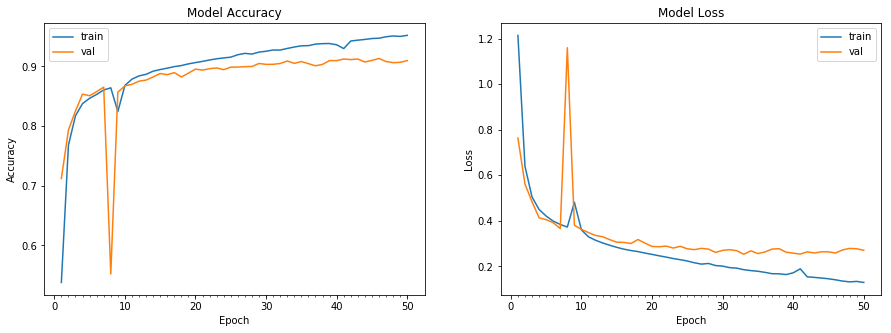

batch size    : 64
epochs        : 50
optimizer     : sgd
learning rate : 0.01
node size     : 128
Epoch 1/50
781/781 [==============================] - 92s 117ms/step - loss: 2.2397 - acc: 0.1695 - val_loss: 1.9977 - val_acc: 0.2653

Epoch 00001: val_loss improved from inf to 1.99768, saving model to models6/rnn_lstm.h5
Epoch 2/50
781/781 [==============================] - 91s 116ms/step - loss: 1.6148 - acc: 0.3866 - val_loss: 1.3735 - val_acc: 0.4439

Epoch 00002: val_loss improved from 1.99768 to 1.37351, saving model to models6/rnn_lstm.h5
Epoch 3/50
781/781 [==============================] - 91s 116ms/step - loss: 1.2753 - acc: 0.4864 - val_loss: 1.1668 - val_acc: 0.5317

Epoch 00003: val_loss improved from 1.37351 to 1.16683, saving model to models6/rnn_lstm.h5
Epoch 4/50
781/781 [==============================] - 91s 116ms/step - loss: 1.0589 - acc: 0.5911 - val_loss: 0.9239 - val_acc: 0.6741

Epoch 00004: val_loss improved from 1.16683 to 0.92394, saving model to models6/rnn_l


Epoch 00037: val_loss did not improve from 0.34678
Epoch 38/50
781/781 [==============================] - 91s 116ms/step - loss: 0.3176 - acc: 0.8832 - val_loss: 0.3412 - val_acc: 0.8736

Epoch 00038: val_loss improved from 0.34678 to 0.34120, saving model to models6/rnn_lstm.h5
Epoch 39/50
781/781 [==============================] - 91s 116ms/step - loss: 0.3107 - acc: 0.8842 - val_loss: 0.3527 - val_acc: 0.8700

Epoch 00039: val_loss did not improve from 0.34120
Epoch 40/50
781/781 [==============================] - 91s 116ms/step - loss: 0.3136 - acc: 0.8852 - val_loss: 0.3351 - val_acc: 0.8783

Epoch 00040: val_loss improved from 0.34120 to 0.33514, saving model to models6/rnn_lstm.h5
Epoch 41/50
781/781 [==============================] - 91s 116ms/step - loss: 0.3076 - acc: 0.8864 - val_loss: 0.3331 - val_acc: 0.8776

Epoch 00041: val_loss improved from 0.33514 to 0.33313, saving model to models6/rnn_lstm.h5
Epoch 42/50
781/781 [==============================] - 91s 116ms/step - l

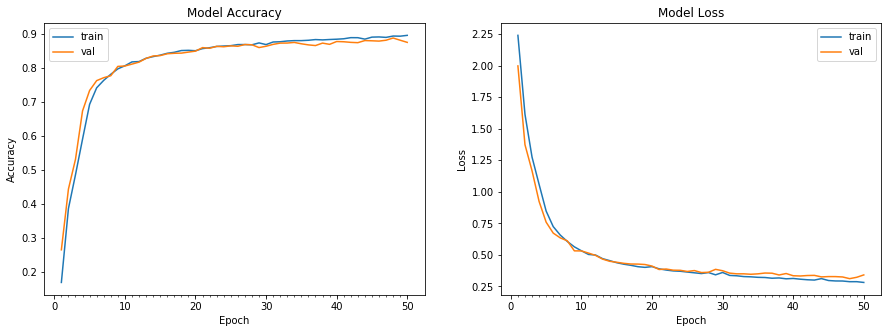

batch size    : 64
epochs        : 50
optimizer     : sgd
learning rate : 0.05
node size     : 128
Epoch 1/50
781/781 [==============================] - 92s 117ms/step - loss: 1.5069 - acc: 0.4188 - val_loss: 1.0341 - val_acc: 0.6069

Epoch 00001: val_loss improved from inf to 1.03410, saving model to models6/rnn_lstm.h5
Epoch 2/50
781/781 [==============================] - 91s 116ms/step - loss: 0.8356 - acc: 0.6912 - val_loss: 0.6466 - val_acc: 0.7730

Epoch 00002: val_loss improved from 1.03410 to 0.64655, saving model to models6/rnn_lstm.h5
Epoch 3/50
781/781 [==============================] - 91s 116ms/step - loss: 0.6614 - acc: 0.7653 - val_loss: 0.5496 - val_acc: 0.8007

Epoch 00003: val_loss improved from 0.64655 to 0.54962, saving model to models6/rnn_lstm.h5
Epoch 4/50
781/781 [==============================] - 91s 116ms/step - loss: 0.5242 - acc: 0.8102 - val_loss: 0.4607 - val_acc: 0.8315

Epoch 00004: val_loss improved from 0.54962 to 0.46075, saving model to models6/rnn_l

781/781 [==============================] - 91s 116ms/step - loss: 0.2093 - acc: 0.9211 - val_loss: 0.2705 - val_acc: 0.9034

Epoch 00039: val_loss improved from 0.27200 to 0.27046, saving model to models6/rnn_lstm.h5
Epoch 40/50
781/781 [==============================] - 91s 116ms/step - loss: 0.2038 - acc: 0.9234 - val_loss: 0.2873 - val_acc: 0.8960

Epoch 00040: val_loss did not improve from 0.27046
Epoch 41/50
781/781 [==============================] - 91s 116ms/step - loss: 0.2022 - acc: 0.9243 - val_loss: 0.2706 - val_acc: 0.9042

Epoch 00041: val_loss did not improve from 0.27046
Epoch 42/50
781/781 [==============================] - 91s 116ms/step - loss: 0.2000 - acc: 0.9254 - val_loss: 0.2755 - val_acc: 0.9019

Epoch 00042: val_loss did not improve from 0.27046
Epoch 43/50
781/781 [==============================] - 91s 116ms/step - loss: 0.1971 - acc: 0.9258 - val_loss: 0.2747 - val_acc: 0.9027

Epoch 00043: val_loss did not improve from 0.27046
Epoch 44/50
781/781 [==========

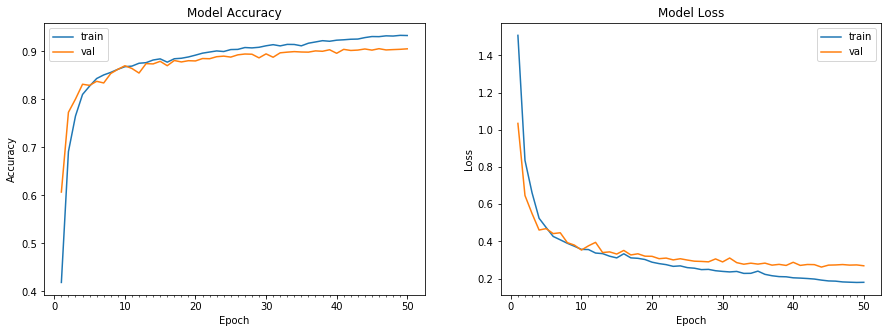

In [3]:
for batch_size in batch_sizes:
  for epochs in num_epochs:
    for optimizer_name in optimizers_name:
      for learning_rate in learning_rates:
        for node_size in node_sizes:
            print("==================")
            print("batch size    : {}".format(batch_size))
            print("epochs        : {}".format(epochs))
            print("optimizer     : {}".format(optimizer_name))
            print("learning rate : {}".format(learning_rate))
            print("node size     : {}".format(node_size))

            if optimizer_name == 'adam':
              optimizer = optimizers.Adam(lr=learning_rate)
            elif optimizer_name == 'rmsprop':
              optimizer = optimizers.RMSprop(lr=learning_rate)
            elif optimizer_name == 'sgd':
              optimizer = optimizers.SGD(lr=learning_rate)

            # Embedding dimensions.
            row_hidden = node_size
            col_hidden = node_size

            
            TRAIN_BATCH_SIZE = batch_size
            TEST_BATCH_SIZE = (batch_size)
            TEST_BATCH_SIZE
            
            train_step = int(TRAIN_DATA_SIZE/TRAIN_BATCH_SIZE)
            test_step = int(TEST_DATA_SIZE/TEST_BATCH_SIZE)
            
            train_batches = train_gen.flow(x_train, y_train, batch_size=TRAIN_BATCH_SIZE, shuffle=False, seed=10)

            test_batches = test_gen.flow(x_test, y_test, batch_size=TEST_BATCH_SIZE, shuffle=False, seed=10)

            row, col, pixel = x_train.shape[1:]
            
            
            # 4D input.
            x = Input(shape=(row, col, pixel))

            # Encodes a row of pixels using TimeDistributed Wrapper.
            encoded_rows = TimeDistributed(LSTM(row_hidden))(x)

            # Encodes columns of encoded rows.
            encoded_columns = LSTM(col_hidden)(encoded_rows)

            # Final predictions and model.
            prediction = Dense(num_classes, activation='softmax')(encoded_columns)

            model = Model(x, prediction)
            model.compile(loss='categorical_crossentropy',
                          optimizer=optimizer,
                          metrics=['accuracy'])

            


            # Training.
            # model.fit(x_train, y_train,
            #           batch_size=batch_size,
            #           epochs=epochs,
            #           verbose=1,
            #           validation_data=(x_test, y_test))
            model_file_name = "models6/rnn_lstm_{}_{}_{}_{}_{}.h5" . format(batch_size, epochs, optimizer_name, learning_rate, node_size)
            checkpoint = ModelCheckpoint(model_file_name, monitor='val_loss', verbose=0, save_best_only= True, mode='auto')

            best_model_file_name = "models6/rnn_lstm.h5"
            best_checkpoint = ModelCheckpoint(best_model_file_name, monitor='val_loss', verbose=1, save_best_only= True, mode='auto')
       
            h = model.fit_generator(train_batches, steps_per_epoch=train_step, validation_data=test_batches, callbacks=[checkpoint, best_checkpoint], validation_steps=test_step, epochs=epochs, verbose=1)
            #h = model.fit_generator(train_batches, validation_data=test_batches, callbacks=[checkpoint, best_checkpoint], verbose=1)
  
            plot_model(h)

In [ ]:
from google.colab import files

print(best_model)
print("Best Stats")
print("==========")
print("accuracy      : {}".format(best_accuracy))
print("batch size    : {}".format(best_batch_size))
print("epochs        : {}".format(best_epochs))
print("optimizer     : {}".format(best_optimizer))
print("learning rate : {}".format(best_learning_rate))
print("node size     : {}".format(best_node_size))

filepath = "models/rnn_lstm_best.h5"
files.download(filepath)